## 01. 匯入套件

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import to_categorical
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## 02. 讀取數字手寫
01. 建立標籤名稱檔
02. 打印訓練與測試集的類別數量
03. 打印訓練與測試集特徵的形狀維度

In [2]:
(x_train_mnist,y_train_minst),(x_test_mnist,y_test_minst) = mnist.load_data()
mnist_label_name = [i for i in range(10)]

print("標籤名稱：",mnist_label_name)
#print("訓練集數字手寫的類別數量:%s" %Counter(y_train_minst))
print("訓練集數字手寫的維度:",x_train_mnist.shape)
#print("測試集數字手寫的類別數量:%s" %Counter(y_test_minst))
print("測試集數字手寫的維度:",x_test_mnist.shape)

11493376/11490434 [==============================] - 110s 10us/step
標籤名稱： [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
訓練集數字手寫的維度: (60000, 28, 28)
測試集數字手寫的維度: (10000, 28, 28)


## 03. 讀取英文手寫
01. 讀取csv檔案
02. 建立標籤名稱檔
03. 打印訓練與測試集的類別數量
04. 打印訓練與測試集特徵的形狀維度

In [4]:
AZdata = pd.read_csv('Data set/A_Z Handwritten Data.csv', header = None)
print("英文手寫維度：",AZdata.shape)
AZ_label_name = [chr(i+65) for i in range(26)]
print("標籤名稱：",AZ_label_name)
AZ_label = np.array(AZdata)[:,0]

AZ_feature = np.array(AZdata)[:,1:785]
AZ_feature = AZ_feature.reshape(len(AZdata),28,28)
#print("英文手寫的類別數量:%s" %Counter(AZ_label))
print("英文手寫的維度:",AZ_feature.shape)

x_train_AZ, x_test_AZ, y_train_AZ, y_test_AZ = train_test_split(AZ_feature,
AZ_label, random_state = 0, test_size = 0.4)

#print("訓練集英文手寫的類別數量:%s" %Counter(y_train_AZ))
print("訓練集英文手寫的維度:",x_train_AZ.shape)
#print("測試集英文手寫的類別數量:%s" %Counter(y_test_AZ))
print("測試集英文手寫的維度:",x_test_AZ.shape)

英文手寫維度： (372451, 785)
標籤名稱： ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
英文手寫的維度: (372451, 28, 28)
訓練集英文手寫的維度: (223470, 28, 28)
測試集英文手寫的維度: (148981, 28, 28)


## 04. 資料集合併與資料前處理
01. 合併特徵、標籤與標籤名稱
02. 資料前處理：獨熱編碼、正規化、改變成輸入的維度

In [5]:
x_train = np.vstack([x_train_mnist, x_train_AZ])
x_test = np.vstack([x_test_mnist, x_test_AZ])
y_train = np.hstack([y_train_minst, y_train_AZ+10])
y_test = np.hstack([y_test_minst, y_test_AZ+10])
label_name = np.hstack([mnist_label_name, AZ_label_name])
print(label_name)

no_one_hot_y_train = y_train
no_one_hot_y_test = y_test

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = np.expand_dims(x_train.astype('float32')/255,-1)
x_test = np.expand_dims(x_test.astype('float32')/255,-1)

print(x_train.shape)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
(283470, 28, 28, 1)


## 05. 定義卷積神經網路模型
01. 輸入層
02. 卷積層
03. 池化層
04. 全連接層
05. 輸出層
06. 激勵函數
07. 捨棄法
08. 補零填充

In [6]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(28,28,1)))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(36, activation='softmax'))
cnn.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxP

## 06. 定義損失函數、優化器

In [7]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## 07. 開始訓練
01. 輸入特徵與標籤
02. 批量數量
03. 迭代次數
04. 給予驗證集(或是從訓練集分割)

In [8]:
history = cnn.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_split= 0.1)

Train on 255123 samples, validate on 28347 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
255123/255123 [==============================] - 328s 1ms/sample - loss: 0.2400 - acc: 0.9289 - val_loss: 0.1265 - val_acc: 0.9757
Epoch 2/20
255123/255123 [==============================] - 316s 1ms/sample - loss: 0.1174 - acc: 0.9641 - val_loss: 0.1021 - val_acc: 0.9830
Epoch 3/20
255123/255123 [==============================] - 315s 1ms/sample - loss: 0.0955 - acc: 0.9702 - val_loss: 0.0744 - val_acc: 0.9865
Epoch 4/20
255123/255123 [==============================] - 314s 1ms/sample - loss: 0.0803 - acc: 0.9747 - val_loss: 0.0670 - val_acc: 0.9866
Epoch 5/20
255123/255123 [==============================] - 314s 1ms/sample - loss: 0.0706 - acc: 0.9771 - val_loss: 0.0496 - val_acc: 0.9895
Epoch 6/20
255123/255123 [==============================] - 314s 1ms/sample - loss: 0.0631 - acc: 0.9797 - val_loss: 0.0474 - val_acc: 0.9890
Epoch 7/20
255123/255123 [=======================

## 08. 驗證指標：繪製學習曲線

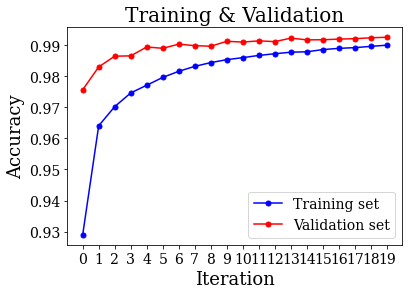

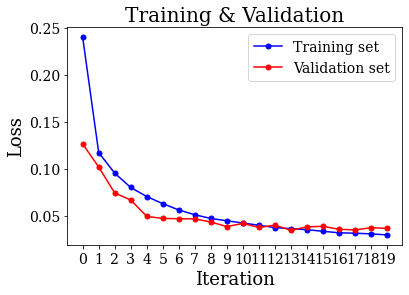

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.rcParams["font.family"] = "serif"
plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.show()

plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.plot(np.arange(len(loss)), loss,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_loss)), val_loss,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
plt.show()

## 09. 驗證指標：準確度與損失值

In [10]:
train_loss, train_acc = cnn.evaluate(x_train, y_train)
print("訓練集的準確度為：%0.4f" %(train_acc))
print("訓練集的損失值為：%0.4f" %(train_loss))

283470/283470 [==============================] - 75s 265us/sample - loss: 0.0144 - acc: 0.9959
訓練集的準確度為：0.9959
訓練集的損失值為：0.0144


## 10. 批量預測：回傳機率

In [11]:
predict = cnn.predict(x_train)
predictions = [np.argmax(one_hot)for one_hot in predict]

## 11. 驗證指標：混淆矩陣 

Text(0.5, 1.0, 'Accuracy: 0.9959')

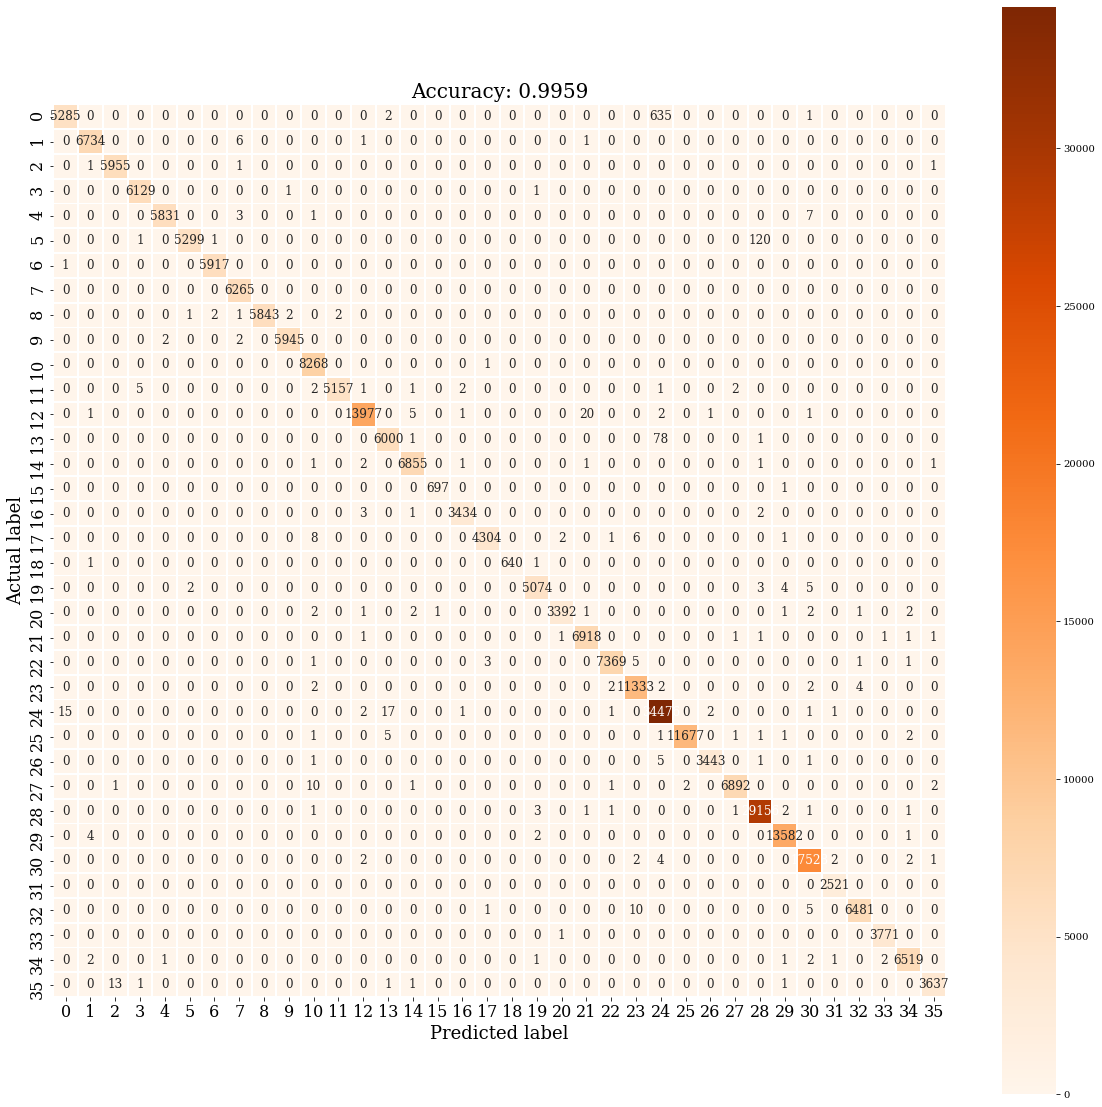

In [12]:
cm = confusion_matrix(no_one_hot_y_train, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0,
square = True, cmap = 'Oranges',annot_kws={"size": 12})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accuracy: %0.4f' %(train_acc), size = 20)

## 12. 儲存模型

In [22]:
cnn.save('cnn_model.h5')
from tensorflow.keras.models import load_model
cnn = load_model('cnn_model.h5')

## 13. 測試模型

(28, 28)


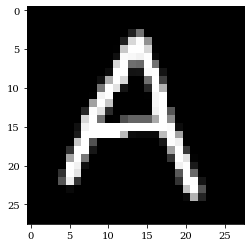

(28, 28, 1)
(1, 28, 28, 1)
[10]


In [37]:
import cv2

img_path = 'A.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28,28))
print(img.shape)

plt.imshow(img, cmap="gray")
plt.show()

pimg = np.expand_dims(img.astype('float32')/255,-1)
print(pimg.shape)
pimg = np.expand_dims(pimg, 0)
print(pimg.shape)

predict = cnn.predict(pimg)
predictions = [np.argmax(one_hot)for one_hot in predict]
print(predictions)